# HBOS Thyroid Data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pyod.models.knn import KNN
from pyod.models.hbos import HBOS
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
def get_excel_columns(n_cols):
    col_list = []
    n = n_cols
    alpha_list = [chr(c) for c in range(ord('A'), ord('Z') + 1)]
    alpha_list.insert(0,'dummy')
    for i in range(1,n+1):
        col_i = ""
        index_list=[]
        p=[]
        while i>26:
            k = i%26
            i = i//26
            if k==0:
                index_list.append(26)
                i = i-1
            else:
                index_list.append(k)
        index_list.append(int(i))
        index_list.reverse()
        for i in index_list:
            p.append(alpha_list[i])
            col_i = "".join(p)
        col_list.append(col_i)
    return col_list

In [4]:
df = pd.read_csv("thyroid.csv", header = None)
df.columns = get_excel_columns(len(df.columns))
print(df.shape)
df.head()

(6916, 22)


,A,B,C,D,E,F,G,H,I,J,...,M,N,O,P,Q,R,S,T,U,V
0,0.45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.061,0.006,0.023,0.087,0.026,o
1,0.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.029,0.015,0.061,0.096,0.064,o
2,0.16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.029,0.019,0.058,0.103,0.056,o
3,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.114,0.003,0.024,0.061,0.039,o
4,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.049,0.003,0.005,0.116,0.004,o


## Train - Test Split

In [5]:
X = df[get_excel_columns(len(df.columns)-1)].values.astype(float)
X[0:5]

array([[0.45 , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.061, 0.006,
        0.023, 0.087, 0.026],
       [0.61 , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.029, 0.015,
        0.061, 0.096, 0.064],
       [0.16 , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.029, 0.019,
        0.058, 0.103, 0.056],
       [0.85 , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.114, 0.003,
        0.024, 0.061, 0.039],
       [0.75 , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.049, 0.003,
        0.005, 0.116, 0.004]])

In [6]:
X = StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.37381409,  1.50050924, -0.39440532, -0.12595114, -0.11547005,
        -0.1996087 , -0.10680283, -0.12050941, -0.13060943, -0.25875595,
        -0.27309428, -0.11482544, -0.09275961, -0.16159443, -0.01202552,
        -0.22878653,  3.53097966, -1.89580666, -2.49798316, -0.55943924,
        -2.52374039],
       [ 0.47207276, -0.66644042, -0.39440532, -0.12595114, -0.11547005,
         5.00980171, -0.10680283, -0.12050941, -0.13060943, -0.25875595,
        -0.27309428, -0.11482544, -0.09275961, -0.16159443, -0.01202552,
        -0.22878653,  1.56865643, -0.69296527, -1.41857341, -0.08886888,
        -1.44467614],
       [-1.90698403, -0.66644042,  2.53546276, -0.12595114, -0.11547005,
        -0.1996087 , -0.10680283, -0.12050941, -0.13060943, -0.25875595,
        -0.27309428, -0.11482544, -0.09275961,  6.18833213, -0.01202552,
        -0.22878653,  1.56865643, -0.15836909, -1.50378997,  0.27713029,
        -1.67184756],
       [ 1.74090305, -0.66644042, -0.39440532, -0.12595114

In [7]:
y = df.iloc[:,-1]
len(y)

6916

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
print("Train set : ", X_train.shape, y_train.shape)
print("Test set : ", X_test.shape, y_test.shape)

Train set :  (5532, 21) (5532,)
Test set :  (1384, 21) (1384,)


In [9]:
y_test_array = y_test.to_numpy().astype(str)
y_test_array = np.where(y_test_array == 'n', 0, 1)

## Testing on different n_bins

In [26]:
error_list = []
accuracy_list= []
error_rate = []

for i in range(1,51):
    h_bows = HBOS(n_bins = i)
    h_bows.fit(X_train)
    y_hat_i = h_bows.predict(X_test)
    n_errors_i = np.count_nonzero(y_hat_i != y_test_array)
    error_list.append(n_errors_i)
    accuracy_list.append((len(y_test)-n_errors_i)/len(y_test))
    error_rate.append(np.mean(y_hat_i != y_test_array))
print(error_list)
print(accuracy_list)
print(error_rate)

[48, 156, 176, 181, 176, 190, 180, 164, 170, 162, 160, 160, 165, 166, 165, 160, 172, 174, 169, 165, 164, 169, 164, 163, 169, 171, 167, 163, 161, 164, 166, 162, 162, 163, 170, 167, 168, 157, 159, 161, 162, 159, 164, 165, 156, 160, 161, 161, 162, 161]
[0.9653179190751445, 0.8872832369942196, 0.8728323699421965, 0.8692196531791907, 0.8728323699421965, 0.8627167630057804, 0.869942196531792, 0.8815028901734104, 0.8771676300578035, 0.8829479768786127, 0.884393063583815, 0.884393063583815, 0.8807803468208093, 0.880057803468208, 0.8807803468208093, 0.884393063583815, 0.8757225433526011, 0.8742774566473989, 0.8778901734104047, 0.8807803468208093, 0.8815028901734104, 0.8778901734104047, 0.8815028901734104, 0.8822254335260116, 0.8778901734104047, 0.8764450867052023, 0.8793352601156069, 0.8822254335260116, 0.8836705202312138, 0.8815028901734104, 0.880057803468208, 0.8829479768786127, 0.8829479768786127, 0.8822254335260116, 0.8771676300578035, 0.8793352601156069, 0.8786127167630058, 0.8865606936416

In [11]:
y_hat_i

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
y_test_array

array([0, 0, 0, ..., 0, 0, 0])

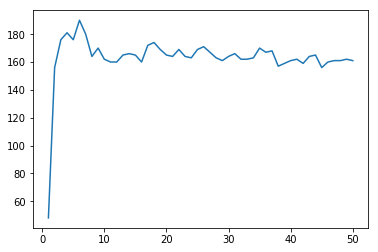

In [13]:
F = sns.lineplot(range(1,51), error_list)

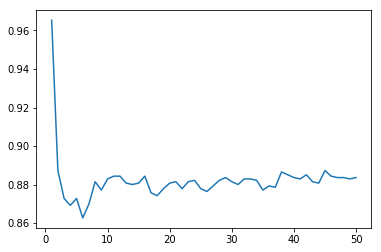

In [14]:
L = sns.lineplot(range(1,51), accuracy_list)

In [17]:
hbos1 = HBOS(n_bins = 1)
hbos1.fit(X_train)
y_hat_1 = hbos1.predict(X_test)
y_hat_1

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix(y_test_array, y_hat_1)

array([[1336,    0],
       [  48,    0]], dtype=int64)

In [22]:
hbos10 = HBOS(n_bins = 10)
hbos10.fit(X_train)
y_hat_10 = hbos10.predict(X_test)
y_hat_10

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
confusion_matrix(y_test_array, y_hat_10)

array([[1209,  127],
       [  35,   13]], dtype=int64)

In [24]:
hbos2 = HBOS(n_bins = 2)
hbos2.fit(X_train)
y_hat_2 = hbos2.predict(X_test)
y_hat_2

array([0, 0, 0, ..., 0, 0, 1])

In [25]:
confusion_matrix(y_test_array, y_hat_2)

array([[1227,  109],
       [  47,    1]], dtype=int64)

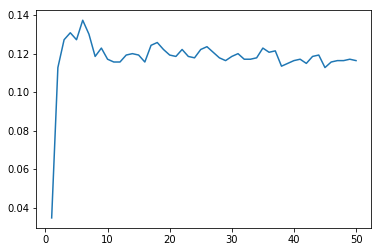

In [27]:
ahem = sns.lineplot(range(1,51), error_rate)